Fourier transforms are a mathematic construct where a function in one space is transformed into a function in another space through integration. How this process is done mathematically will not be covered here, instead we will use a series of `Numpy` functions to do so. The function of `fft` performs a Fourier transform on the data selected, typically a Numpy array.

In this assigment, as grayscale image is converted into a `Numpy` array. The size of the image is used as a filter - any data beyond a certain point from the center is excluded.

In [6]:
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.fft import *
im = Image.open("Pattern.jpg").convert('L')
type(im)
data = np.asarray(im)
data
size =np.shape(data)

imageFFT = np.fft.fft2(data)
imageShifted = np.fft.fftshift(imageFFT)
filtered = np.copy(imageShifted)

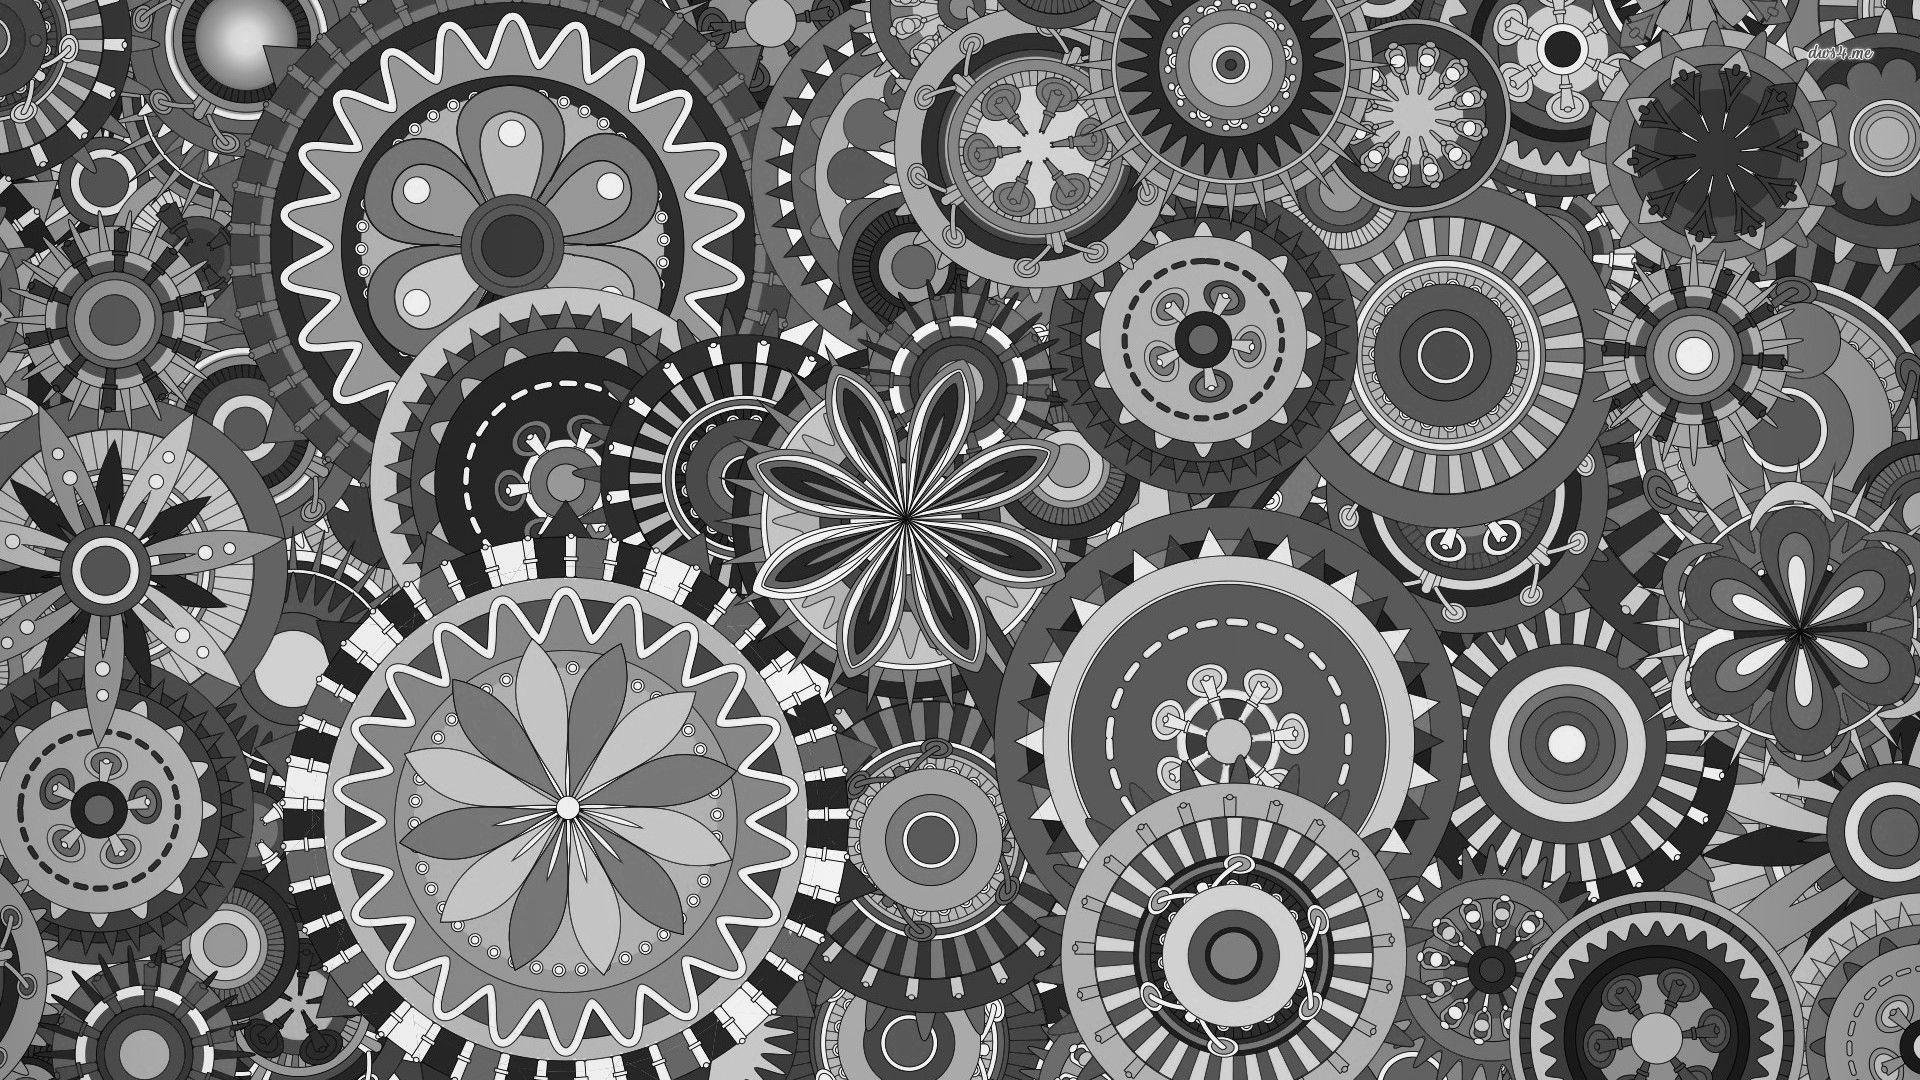

In [7]:
im

In [8]:
filtered

array([[-22063.        -1.81898940e-12j,  -5330.08716477-5.40543404e+03j,
          2034.51720791+9.13020285e+02j, ...,
        -19262.19902124+7.40899494e+03j,   2034.51720791-9.13020285e+02j,
         -5330.08716477+5.40543404e+03j],
       [-10262.49624798-2.34317207e+04j,  -8284.24938984-9.63175301e+03j,
         10391.44133868+8.20699538e+03j, ...,
        -10251.1230865 +8.31357895e+03j,  -9231.41389667+3.91974831e+03j,
          2496.60572951-1.22439504e+03j],
       [  6628.38183158+1.32739732e+03j,  -2195.29352846+2.01610223e+03j,
         -2376.69021125+3.97813614e+02j, ...,
        -12437.5798286 -9.17185287e+03j,  14284.90763989+9.81407307e+03j,
          2031.13751705-1.46962833e+04j],
       ...,
       [ 12780.84139051+7.10908823e+02j, -24393.99443615+1.19883429e+04j,
         -7798.4949374 -6.79560803e+03j, ...,
          -768.15471108+1.92579508e+04j,  19222.22013529-6.66199473e+03j,
        -34897.34314057+5.71393938e+03j],
       [  6628.38183158-1.32739732e+03j,   2

In [9]:
size


(1080, 1920)

In [10]:
maskY = 190
maskX = 290

filtered[0:maskY,:] = 0+0j
filtered[-maskY:,:] = 0+0j
filtered[:,0:maskX,] = 0+0j
filtered[:,-maskX:] = 0+0j

In [11]:
FiltShift = np.fft.ifftshift(filtered)
recon =np.fft.ifft2(FiltShift)

In [12]:
imSee = filtered
mag = (imSee*np.conj(imSee)).real


The Fourier transforms on the data in the array can result in complex numbers. To eliminate this, the conjugate of the array is taken and then multiplied in order to eliminate the imaginary numbers.

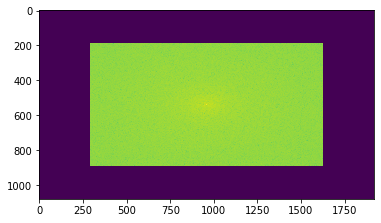

In [13]:
plt.imshow(mag**0.01);

In [14]:
toSee = recon
magToSee = (toSee*np.conj(toSee)).real

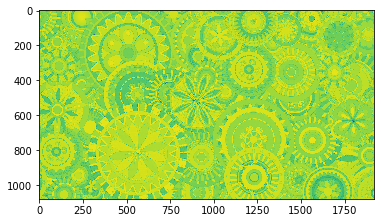

In [15]:
plt.imshow(magToSee**0.01);

The end result is a smaller image made of different colors based off how bright or dark various areas were on the original. However, for unknown reasons, the pattern of Fourier transforms used results in a blank sheet of purple. This happened with multiple different images.